In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

## Web scrape with beautifull soup

* In here i want to categorize Location area beased on location Average price per square foot 
* https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad this is the site for used to data scrape 

#### This is the dynamic site 


<img src="ss11.png" alt="Alt text" style="width: 900px; height: auto;" />

In [3]:
import requests
from bs4 import BeautifulSoup as bs

In [4]:
# load web page content - for first page 
r = requests.get('https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad')

# convert web page content to beautifulsoup content
soup = bs(r.content)
# print(soup)
print(soup.prettify())  

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   Property Rates in Ahmedabad - 2020 - Real Estate Property Price &amp; Trends in Ahmedabad
  </title>
  <meta content="2020 Property Rates in Ahmedabad - Search for residential property price &amp; real estate trends &amp; Compare area wise property rates across Ahmedabad. Check Property Index Ahmedabad on Makaan.com." name="description"/>
  <meta content="Property rates in Ahmedabad, Property trends in Ahmedabad, Ahmedabad property rates, Ahmedabad property rates area wise, Ahmedabad property price, real estate trends in Ahmedabad, Ahmedabad property rates sector wise" name="keywords"/>
  <meta content="#fff" id="themeColor" name="theme-color"/>
  <meta content="origin" name="referrer"/>
  <meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/>
  <meta content="155462194517712" name="fb:pages"/>
  <meta content="India" name="country"/>
  <meta c

In [5]:
# the location names retriev

span_elements = soup.find_all('span', itemprop='name')
span_elements

[<span itemprop="name">home</span>,
 <span itemprop="name">Property Rates &amp; Price Trends in India</span>,
 <span itemprop="name">Bopal</span>,
 <span itemprop="name">Shela</span>,
 <span itemprop="name">Gota</span>,
 <span itemprop="name">Chandkheda</span>,
 <span itemprop="name">Thaltej</span>,
 <span itemprop="name">Bodakdev</span>,
 <span itemprop="name">Prahlad Nagar</span>,
 <span itemprop="name">South Bopal</span>,
 <span itemprop="name">Jodhpur</span>,
 <span itemprop="name">Satellite</span>,
 <span itemprop="name">Shilaj</span>,
 <span itemprop="name">Motera</span>,
 <span itemprop="name">Vejalpur</span>,
 <span itemprop="name">Ambli</span>,
 <span itemprop="name">Vastrapur</span>,
 <span itemprop="name">Makarba</span>,
 <span itemprop="name">Near Nirma University On SG Highway</span>,
 <span itemprop="name">Sanand</span>,
 <span itemprop="name">Vastral</span>,
 <span itemprop="name">Ambavadi</span>,
 <span itemprop="name">Ghatlodiya</span>,
 <span itemprop="name">Ghuma</sp

In [6]:
for span in span_elements:
    print(span.text.strip())

home
Property Rates & Price Trends in India
Bopal
Shela
Gota
Chandkheda
Thaltej
Bodakdev
Prahlad Nagar
South Bopal
Jodhpur
Satellite
Shilaj
Motera
Vejalpur
Ambli
Vastrapur
Makarba
Near Nirma University On SG Highway
Sanand
Vastral
Ambavadi
Ghatlodiya
Ghuma
Jodhpur Village
Paldi
Navrangpura
Science City
Nikol
Nava Naroda
Naranpuraa
Memnagar
Maninagar
Ranip
Near Vaishno Devi Circle On SG Highway
Jagatpur
Vasna
Sola
New Ranip
Sanathal
Gurukul
Tragad
Jivraj Park
Narolgam
Chanakyapuri
Naroda
Vatva
Amraiwadi
Manipur
Ellisbridge
Kudasan
Gulbai Tekra
Ghodsar
Juhapura
Chandlodia
Odhav
Shahibuag
Isanpur
New Maninagar
Shahibaug
Rancharda
Bapunagar
Bopal
Shela
Gota
Chandkheda
Thaltej
Bodakdev
Prahlad Nagar
South Bopal
Jodhpur
Satellite
Shilaj
Motera
Vejalpur
Ambli
Vastrapur
Makarba
Near Nirma University On SG Highway
Sanand
Vastral
Ambavadi
Ghatlodiya
Ghuma
Jodhpur Village
Paldi
Navrangpura
Science City
Nikol
Nava Naroda
Naranpuraa
Memnagar
Maninagar
Ranip
Near Vaishno Devi Circle On SG Highway
Ja

##### In the previous code, we retrieved all items with the itemprop='name' attribute, but we specifically need the location area names and want to avoid any duplicates

In [7]:
span_elements = soup.find_all('span', itemprop='name')

# Track unique elements
unique_elements = []
seen_itemprops = set()

for span in span_elements:
    if span not in seen_itemprops:
        seen_itemprops.add(span)
        unique_elements.append(span)

# Extract names from the 3rd to the 60th unique set
start_index = 2  # 0-based index, so 3rd element is at index 2
end_index = 119

if len(unique_elements) >= start_index + 1:
    selected_elements = unique_elements[start_index:end_index]
    names = [element.get_text() for element in selected_elements]
    for name in names:
        print(name)
else:
    print("There are less than 60 unique element sets.")

Bopal
Shela
Gota
Chandkheda
Thaltej
Bodakdev
Prahlad Nagar
South Bopal
Jodhpur
Satellite
Shilaj
Motera
Vejalpur
Ambli
Vastrapur
Makarba
Near Nirma University On SG Highway
Sanand
Vastral
Ambavadi
Ghatlodiya
Ghuma
Jodhpur Village
Paldi
Navrangpura
Science City
Nikol
Nava Naroda
Naranpuraa
Memnagar
Maninagar
Ranip
Near Vaishno Devi Circle On SG Highway
Jagatpur
Vasna
Sola
New Ranip
Sanathal
Gurukul
Tragad
Jivraj Park
Narolgam
Chanakyapuri
Naroda
Vatva
Amraiwadi
Manipur
Ellisbridge
Kudasan
Gulbai Tekra
Ghodsar
Juhapura
Chandlodia
Odhav
Shahibuag
Isanpur
New Maninagar
Shahibaug
Rancharda
Bapunagar


#### now want to get location price per square foot 

    <td class="ta-r" itemscope="" itemtype="http://schema.org/UnitPriceSpecification">
                 <span class="currency">
                 </span>
                 <span itemprop="minPrice">
                  3,333
                 </span>
                 -
                 <span itemprop="maxPrice">
                  5,525 / sqft
                 </span>
                </td>
                <td class="ta-r">
                 <span class="currency">
                 </span>
                 5,146.94 / sqft
                </td>
                <td class="growth rise ta-c">
                 <span class="val">
                  5.6%
                 </span>
this is the inspection prevoiusly give , according to this 2 data sets under the currency    

In [8]:
price_elements = soup.find_all('span', class_='currency')
price_elements

for price_element in price_elements:
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)


9,964.39 / sqft

12,152.33 / sqft

8,507.45 / sqft

9,20.77 / sqft

13,762.86 / sqft

14,350.21 / sqft

11,30.71 / sqft

7,960.29 / sqft

8,60.01 / sqft

34,953.46 / sqft

9,749.97 / sqft

6,500.98 / sqft

7,876.75 / sqft

13,991.88 / sqft

9,337.6 / sqft

7,328.18 / sqft

8,45.51 / sqft

6,258.38 / sqft

5,24.48 / sqft

9,721.93 / sqft

6,026 / sqft

5,986.6 / sqft

8,817.27 / sqft

7,75.72 / sqft

8,145.34 / sqft

8,541.66 / sqft

8,981.9 / sqft

6,515.15 / sqft

8,44.56 / sqft

10,635.12 / sqft

10,289.86 / sqft

6,801.49 / sqft

8,999.94 / sqft

7,225.88 / sqft

8,987.84 / sqft

8,859.01 / sqft

4,905.64 / sqft

3,897.06 / sqft

6,720.21 / sqft

8,485.29 / sqft

5,89.28 / sqft

5,861.47 / sqft

8,130.9 / sqft

4,311.12 / sqft

5,840.44 / sqft

4,220.74 / sqft

5,499.66 / sqft

8,502.26 / sqft

4,212.66 / sqft

8,160.71 / sqft

7,762.27 / sqft

6,410.04 / sqft

4,722.57 / sqft

4,214.54 / sqft

10,278.71 / sqft

8,284.63 / sqft

6,422.46 / sqft

8,499.28 / sqft

5,162.65 / sqft

14

* in here Averege price per sqft and range of prices for sqft both include
* we only want first 60 records

In [9]:
# Assuming price_elements is a list of elements you're iterating over
for index, price_element in enumerate(price_elements):
    if index >= 119:  # Stop after processing the first 60 items
        break
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)



9,964.39 / sqft

12,152.33 / sqft

8,507.45 / sqft

9,20.77 / sqft

13,762.86 / sqft

14,350.21 / sqft

11,30.71 / sqft

7,960.29 / sqft

8,60.01 / sqft

34,953.46 / sqft

9,749.97 / sqft

6,500.98 / sqft

7,876.75 / sqft

13,991.88 / sqft

9,337.6 / sqft

7,328.18 / sqft

8,45.51 / sqft

6,258.38 / sqft

5,24.48 / sqft

9,721.93 / sqft

6,026 / sqft

5,986.6 / sqft

8,817.27 / sqft

7,75.72 / sqft

8,145.34 / sqft

8,541.66 / sqft

8,981.9 / sqft

6,515.15 / sqft

8,44.56 / sqft

10,635.12 / sqft

10,289.86 / sqft

6,801.49 / sqft

8,999.94 / sqft

7,225.88 / sqft

8,987.84 / sqft

8,859.01 / sqft

4,905.64 / sqft

3,897.06 / sqft

6,720.21 / sqft

8,485.29 / sqft

5,89.28 / sqft

5,861.47 / sqft

8,130.9 / sqft

4,311.12 / sqft

5,840.44 / sqft

4,220.74 / sqft

5,499.66 / sqft

8,502.26 / sqft

4,212.66 / sqft

8,160.71 / sqft

7,762.27 / sqft

6,410.04 / sqft

4,722.57 / sqft

4,214.54 / sqft

10,278.71 / sqft

8,284.63 / sqft

6,422.46 / sqft

8,499.28 / sqft

5,162.65 / sqft



In [11]:
base_url = "https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad?page={}"

all_names = []

for page in range(2, 7):  # Pages 2 to 6
    url = base_url.format(page)
    response = requests.get(url)
    
soup = bs(r.content)
# print(soup)
print(soup.prettify())      

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   Property Rates in Ahmedabad - 2020 - Real Estate Property Price &amp; Trends in Ahmedabad
  </title>
  <meta content="2020 Property Rates in Ahmedabad - Search for residential property price &amp; real estate trends &amp; Compare area wise property rates across Ahmedabad. Check Property Index Ahmedabad on Makaan.com." name="description"/>
  <meta content="Property rates in Ahmedabad, Property trends in Ahmedabad, Ahmedabad property rates, Ahmedabad property rates area wise, Ahmedabad property price, real estate trends in Ahmedabad, Ahmedabad property rates sector wise" name="keywords"/>
  <meta content="#fff" id="themeColor" name="theme-color"/>
  <meta content="origin" name="referrer"/>
  <meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/>
  <meta content="155462194517712" name="fb:pages"/>
  <meta content="India" name="country"/>
  <meta c

##### for page 2 

In [13]:
# load web page content - for first page 
r = requests.get('https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad?page=2')

# convert web page content to beautifulsoup content
soup = bs(r.content)
# print(soup)
print(soup.prettify())  

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   Property Rates in Ahmedabad - 2020 - Real Estate Property Price &amp; Trends in Ahmedabad - Page 2
  </title>
  <meta content="Page 2 2020 Property Rates in Ahmedabad - Search for residential property price &amp; real estate trends &amp; Compare area wise property rates across Ahmedabad. Check Property Index Ahmedabad on Makaan.com." name="description"/>
  <meta content="Property rates in Ahmedabad, Property trends in Ahmedabad, Ahmedabad property rates, Ahmedabad property rates area wise, Ahmedabad property price, real estate trends in Ahmedabad, Ahmedabad property rates sector wise" name="keywords"/>
  <meta content="#fff" id="themeColor" name="theme-color"/>
  <meta content="origin" name="referrer"/>
  <meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/>
  <meta content="155462194517712" name="fb:pages"/>
  <meta content="India" name="coun

In [14]:
span_elements = soup.find_all('span', itemprop='name')

# Track unique elements
unique_elements = []
seen_itemprops = set()

for span in span_elements:
    if span not in seen_itemprops:
        seen_itemprops.add(span)
        unique_elements.append(span)

# Extract names from the 3rd to the 60th unique set
start_index = 2  # 0-based index, so 3rd element is at index 2
end_index = 119

if len(unique_elements) >= start_index + 1:
    selected_elements = unique_elements[start_index:end_index]
    names = [element.get_text() for element in selected_elements]
    for name in names:
        print(name)
else:
    print("There are less than 60 unique element sets.")

Sola Village
Godhavi
Nava Vadaj
Ghatlodia
Usman Pura
Bhat
Ognaj
Naryanpura
Dholera
Nirnay Nagar
Chharodi
Sarkhej
Santej
Chekhla
Hathijan
Palodia
Thol
Bavla
Sughad
Koteshwar
Sindhubhavan Road
Chandlodiya
Changodar
Koba
Khokhra
Mahadev Nagar
Bhadaj
Maninagar East
Shrinand Nagar
Adalaj
Kankaria
New C G Road
Thakkarbapa Nagar
Hansol
Nana Chiloda
Iscon Ambli Road
Narol
Sabarmati
Satlasana
Kotarpur
Moraiya
Vaishnodevi
Shahpur
Kasindra
kolat
Mumatpura
Bagodra
Khodiyar
Lambha
Jashoda Nagar
Nehru Nagar
Ramol
Ahmedabad Cantonment
Asarwa
Saijpur Bogha
Surdhara Circle
Wadaj
Vadsar
Aslali
Bareja


In [15]:
price_elements = soup.find_all('span', class_='currency')
price_elements

# Assuming price_elements is a list of elements you're iterating over
for index, price_element in enumerate(price_elements):
    if index >= 119:
        break
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)



7,797.44 / sqft

5,8.41 / sqft

6,69.58 / sqft

5,652.2 / sqft

6,989.16 / sqft

5,798.29 / sqft

4,363.38 / sqft

6,443.82 / sqft

4,824.61 / sqft

8,156.72 / sqft

4,689.06 / sqft

4,97.52 / sqft

4,56.09 / sqft

4,756.25 / sqft

4,833.94 / sqft

9,625 / sqft

4,364.2 / sqft

2,760.87 / sqft

4,493.24 / sqft

4,105.33 / sqft

4,351.59 / sqft

5,133.58 / sqft

4,761.8 / sqft

4,693.64 / sqft

5,871.79 / sqft

3,776.33 / sqft

5,200.73 / sqft

4,232.8 / sqft

3,691.83 / sqft

8,237.98 / sqft

2,961.28 / sqft

9,349.89 / sqft

4,13.09 / sqft

3,201.03 / sqft

1,955.19 / sqft

5,624.27 / sqft

3,140.46 / sqft

5,805 / sqft

2,77.26 / sqft

3,149.94 / sqft

3,863.64 / sqft

2,685.51 / sqft

13,414.63 / sqft

5,692.31 / sqft

4,806.2 / sqft

3,787.88 / sqft

4,122.22 / sqft

2,386.83 / sqft

12,730.48 / sqft

1,666.67 / sqft

6,259.4 / sqft

13,529.18 / sqft

12,797.62 / sqft

20,506.92 / sqft

58,333.33 / sqft

10,61.25 / sqft

3,760.42 / sqft

6,143.29 / sqft

12,222.22 / sqft



#### for page 3 

In [16]:
# load web page content - for first page 
r = requests.get('https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad?page=3')

# convert web page content to beautifulsoup content
soup = bs(r.content)
# print(soup)
#print(soup.prettify())  

span_elements = soup.find_all('span', itemprop='name')

# Track unique elements
unique_elements = []
seen_itemprops = set()

for span in span_elements:
    if span not in seen_itemprops:
        seen_itemprops.add(span)
        unique_elements.append(span)

# Extract names from the 3rd to the 60th unique set
start_index = 2  # 0-based index, so 3rd element is at index 2
end_index = 119

if len(unique_elements) >= start_index + 1:
    selected_elements = unique_elements[start_index:end_index]
    names = [element.get_text() for element in selected_elements]
    for name in names:
        print(name)
else:
    print("There are less than 60 unique element sets.")

Hebatpur
Meghani Nagar
Naranpura Road
Neww CG Road
S G Highway
Adraj
CG Road
Jaspur
Thaltej Shilaj Road
Vishala
Dani Limda
Hatkeshwar
Sachana
Anand Nagar
India Colony
Kalupur
Lapkaman
Law Garden
Maninagar West
Motera Stadium Road
Sarkhej Okaf
Shantipura
Zundal
Saraspur
Rethal
Ayojan Nagar
BopalGhuma Road
CTM
Kathwada
Keshav Nagar
new c g road chandkheda
Old Wadaj
Rakhial
Ramdev Nagar
shastri Nagar
Lakshmanpura
Mankol
baghban party plot
Barejadi
Behrampura
Chharodi Ahmedabad West
Ghodasar Road
Gurukul Road
J 18 TP 44 chandkheda
Khadia
Mithakhali
Narayan Nagar
Parimal Garden
Shyamal Cross Road
TelavGuma Road
Zydus Hospital Road
Ahmedabad Patan Highway Road
Ashram Road
Bakrol Circle
Chimanlal Girdharlal Road
Corporate Road
Dantali
Devdholera
Goraj
Jethalaj


In [17]:
price_elements = soup.find_all('span', class_='currency')
price_elements

# Assuming price_elements is a list of elements you're iterating over
for index, price_element in enumerate(price_elements):
    if index >= 119:
        break
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)



7,671.96 / sqft

4,471.38 / sqft

5,000 / sqft

4,562.18 / sqft

3,495.37 / sqft

6,563.31 / sqft

3,461 / sqft

5,418.8 / sqft

3,508.77 / sqft

1,812.31 / sqft

3,882 / sqft

6,632.65 / sqft

3,22.96 / sqft

3,216.78 / sqft

3,953.76 / sqft

2,846.39 / sqft

5,867.35 / sqft

3,809.52 / sqft

3,940.89 / sqft

6,560.94 / sqft

5,219.7 / sqft

2,910.05 / sqft

4,506.61 / sqft

2,856.73 / sqft

6,666.67 / sqft

7,559.2 / sqft

6,349.21 / sqft

5,446.62 / sqft

5,590.44 / sqft

13,000 / sqft

39,090 / sqft

5,310.46 / sqft

11,296.3 / sqft

8,000 / sqft

6,110.72 / sqft

7,500 / sqft

5,37.04 / sqft

5,333 / sqft

5,555.56 / sqft

13,333 / sqft

3,717.39 / sqft

1,189.33 / sqft

9,984.87 / sqft

14,444.44 / sqft

12,225 / sqft

25,000 / sqft

25,000 / sqft

15,555 / sqft

3,311.97 / sqft

20,740.74 / sqft

22,222.22 / sqft

4,686.23 / sqft

8,333.33 / sqft

611.11 / sqft

7,142.86 / sqft

22,222.22 / sqft

777.78 / sqft

596.64 / sqft

17,283.95 / sqft



#### for page 4

In [18]:
# load web page content - for first page 
r = requests.get('https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad?page=4')

# convert web page content to beautifulsoup content
soup = bs(r.content)
# print(soup)
#print(soup.prettify())  

span_elements = soup.find_all('span', itemprop='name')

# Track unique elements
unique_elements = []
seen_itemprops = set()

for span in span_elements:
    if span not in seen_itemprops:
        seen_itemprops.add(span)
        unique_elements.append(span)

# Extract names from the 3rd to the 60th unique set
start_index = 2  # 0-based index, so 3rd element is at index 2
end_index = 119

if len(unique_elements) >= start_index + 1:
    selected_elements = unique_elements[start_index:end_index]
    names = [element.get_text() for element in selected_elements]
    for name in names:
        print(name)
else:
    print("There are less than 60 unique element sets.")

Jodhpur Cross Road
Judges Bungalow
Judges Bungalow Road
Khodiar Nagar
Kuber Nagar
Manekbaugh
Maninagar Railway Station Road
mansi circle
Moti Devati
Sardar Patel Ring Road
shyamal
University Area
Vinzol
Zundal Circle
Visalpur
Dholka
Jesangpura
acher
Akhbar Nagar Circle
Ambawadi Circle
Bavlu
Bhairavnath
Commerce Six Rd
Dudheshwar
Hirawadi Road
Kadi Road
Kalikund
Karnavati Club Road
Kathwara
Kuha
Naroda Dehgam Road
Nasmed
Navrang Circle
New Wadaj
Nikol Gam Rd
Prernatirth Derasar
Rambaug
Raysan
Satellite Society
Shilaj Circle
Sindhu Bhavan Marg
Thakkarbapa Nagar Road
Ujala Circle
Vithalapur
100 Feet Anand Nagar Road
Ambli Bopal Road
Ambli Iskon Road
Anjali Cross Road
Ankur Cross Road
Arohi Club Road
Astodia Chakla
Azad Society
Azad Society Road
Bapu Nagar Road
Bhadra
Bhavna Tenament Vasna Telephone Exchange
bhuyangdev Cross Road
Bodakdev Road
Bopal Road
Chandranagar Road


In [19]:
price_elements = soup.find_all('span', class_='currency')
price_elements

# Assuming price_elements is a list of elements you're iterating over
for index, price_element in enumerate(price_elements):
    if index >= :
        break
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)


4,800 / sqft

9,523.81 / sqft

866.67 / sqft

7,727.07 / sqft

2,327.1 / sqft

4,86.28 / sqft

3,400 / sqft

6,410.26 / sqft

4,186.05 / sqft

2,666.67 / sqft

3,375 / sqft

7,46.06 / sqft

2,773.12 / sqft

2,660 / sqft

3,908.43 / sqft

3,268.74 / sqft

7,28.83 / sqft

3,611.11 / sqft

6,964.21 / sqft

4,914.29 / sqft

2,415.28 / sqft

2,314 / sqft

7,211.54 / sqft

6,188.12 / sqft

3,888.89 / sqft

2,777.78 / sqft

4,536.85 / sqft

13,333.33 / sqft

12,731.48 / sqft

18,888.89 / sqft

962.96 / sqft

10,000 / sqft

9,122.81 / sqft

657.41 / sqft

3,333.33 / sqft

17,777.78 / sqft

687.6 / sqft

16,666.67 / sqft

7,222.22 / sqft

1,347.1 / sqft

14,843 / sqft

10,833.33 / sqft

7,777.78 / sqft

45,987.05 / sqft

16,666.67 / sqft

14,444.44 / sqft

19,444.44 / sqft

16,776.21 / sqft

5,555.56 / sqft

7,547 / sqft

10,144.93 / sqft
3,543 - 9,000 / sqft
6,235
4,573 - 9,628 / sqft
8,712
3,900 - 9,328 / sqft
8,278
3,617 - 8,463 / sqft
7,173
3,552 - 7,407 / sqft
6,094
3,523 - 13,778 / sqft


#### for page 5

In [20]:
# load web page content - for first page 
r = requests.get('https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad?page=5')

# convert web page content to beautifulsoup content
soup = bs(r.content)
# print(soup)
#print(soup.prettify())  

span_elements = soup.find_all('span', itemprop='name')

# Track unique elements
unique_elements = []
seen_itemprops = set()

for span in span_elements:
    if span not in seen_itemprops:
        seen_itemprops.add(span)
        unique_elements.append(span)

# Extract names from the 3rd to the 60th unique set
start_index = 2  # 0-based index, so 3rd element is at index 2
end_index = 119

if len(unique_elements) >= start_index + 1:
    selected_elements = unique_elements[start_index:end_index]
    names = [element.get_text() for element in selected_elements]
    for name in names:
        print(name)
else:
    print("There are less than 60 unique element sets.")

Chenpur
Dakshini Society
Devnagar
Dhandhuka
Digvijaynagar
Drive in Rd
Gandhi Nagar
Geratpur
Ghuma Bopal Road
GIDC Vatwa
gota SG higway
Gulab Tower Road
Hindu Colony
Hirabaug Railway Crossing Road
Hirawadi
IOC Road
ISCON Cross Road
Jamalpur
Jivraj Park Vejalpur Road
Judges Bungalow Cross Road
Kadipur
Kali
Kamod
Kankaria Lakefront Walkway
Khamasa
Khanderavpura
Khanpur
Koteshwar Bhat Road
Koteshwar Road
Krishnanagar
Kundal
Lal Darwaza
Lekhamba
Lilapur
Makarba Road
Memar
Nandanvan
Nehru Nagar Amraiwadi
Nehru Nagar Circle
New India Colony
New Sharda Mandir Road
Nikol Ring Road
NikolNaroda Road
Off CG Road
Panchwati Cross road
Panjarapole
Payal Nagar Road
Piplaj
Prerna Tirth Road
Raipur
Rajpath Society Road
Ranoda
Sanand Heights Society
Santipura
Sardar Colony
Sardar Nagar
Satellite Road
Sattadhar Cross Road
Science City Circle
Shahibaug Flyover


In [24]:
price_elements = soup.find_all('span', class_='currency')
price_elements

# Assuming price_elements is a list of elements you're iterating over
for index, price_element in enumerate(price_elements):
    if index >= 119:
        break
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)



4,21.16 / sqft

666.67 / sqft

2,556.65 / sqft

5,361.76 / sqft

4,166.67 / sqft

5,727.38 / sqft

1,743.5 / sqft

8,400 / sqft

3,95.24 / sqft

5,562.5 / sqft

6,875 / sqft

2,347 / sqft

7,133.33 / sqft

8,888.89 / sqft

11,403.51 / sqft

563.64 / sqft

25,000 / sqft

3,333.33 / sqft

13,888.89 / sqft

202.61 / sqft

1,558.56 / sqft

722.22 / sqft

341.03 / sqft

611 / sqft

4,400.64 / sqft

8,361.28 / sqft

22,222.22 / sqft

833.33 / sqft

25,333 / sqft

16,666.67 / sqft

916.8 / sqft

2,222.22 / sqft

2,350.43 / sqft

9,62.5 / sqft

4,375 / sqft
3,543 - 9,000 / sqft
6,235
4,573 - 9,628 / sqft
8,712
3,900 - 9,328 / sqft
8,278
3,617 - 8,463 / sqft
7,173
3,552 - 7,407 / sqft
6,094
3,523 - 13,778 / sqft
9,596
4,060 - 9,502 / sqft
6,562
5,793 - 12,666 / sqft
7,540
2,899 - 5,466 / sqft
4,631
4,300 - 6,734 / sqft
4,876
3,991 - 10,608 / sqft
5,824
3,825 - 8,693 / sqft
6,324
3,700 - 12,069 / sqft
6,698
3,606 - 7,853 / sqft
7,377
3,200 - 9,240 / sqft
6,419
3,918 - 9,129 / sqft
7,130
4,500 -

#### for page 6

In [29]:
# load web page content - for first page 
r = requests.get('https://www.makaan.com/price-trends/property-rates-for-buy-in-ahmedabad?page=6')

# convert web page content to beautifulsoup content
soup = bs(r.content)
# print(soup)
#print(soup.prettify())  

span_elements = soup.find_all('span', itemprop='name')

# Track unique elements
unique_elements = []
seen_itemprops = set()

for span in span_elements:
    if span not in seen_itemprops:
        seen_itemprops.add(span)
        unique_elements.append(span)

# Extract names from the 3rd to the 60th unique set
start_index = 2  # 0-based index, so 3rd element is at index 2
end_index = 119

if len(unique_elements) >= start_index + 1:
    selected_elements = unique_elements[start_index:end_index]
    names = [element.get_text() for element in selected_elements]
    for name in names:
        print(name)
else:
    print("There are less than 60 unique element sets.")

Shantivan Ahmedabad
Shayona City Road
Shivranjni Cross Roads
Smruti Mandir Road
South Bopal Road
SP Ring Road
Sterling City
Subhash Bridge
Sun City Road
Vahelal
Vijay Cross Roads
Viramgam
Virat Nagar Road
Visat Circle
Kadi
Kheda
Bayad
Nalsarovar
Vataman
Bholad
Fedara
Kamiyala
Mandal
 Times Of India Road
10 Sharanam Road
100 Feet Ring Road
100fit road
120 Feet Ring Road
132 Ft Ring Road
2 Kashi Ram Road
2BHK House For Rent AT Gurukul
3BHK Bungalow Rent At Science City
3Bhk Flat for rent At Science City
3BHK House For Rent AT Thaltej Hebatpur Road
Aabugiri Tenement
Aakaru Cher Road
Aarohi Club Road
Aaryan Gloria
Abhishek Society
Acharya Narendradev Nagar
Adarsh Nagar
Adinath Nagar
Aditya Nagar
Adroda
Ahbab Nagar
Ahemadabad Modasa Road
Ahmedabad City Tennis Foundation
ahmedabad gujrat
Ahmedabad Jilla Panchayat Office
Ahmedabad Mehsana Highway
Ahmedabad Palanpur Road
ahmedabad rajkot highway
ahmedabad rajkot highway 8
Ahmedabad Sarkhej Main Road
Ahmedabad Zalod Highway
AhmedabadVadodara Ex

In [31]:
price_elements = soup.find_all('span', class_='currency')
price_elements

# Assuming price_elements is a list of elements you're iterating over
for index, price_element in enumerate(price_elements):
    if index >=6 :
        break
    if price_element.next_sibling:
        price_text = price_element.next_sibling.strip()
        print(price_text)



6,122.45 / sqft

5,666.67 / sqft

4,700 / sqft


## upload SQL data cleaning data scrape file 

* get idea about how this data set disributed 
* then get 3 categorisez based on this and previous manuall web searches


In [32]:
df = pd.read_csv('web_data_scrape.csv')
df.head()

,ahamedabad_areas,AvgPrice
0,Bopal,9964.39
1,Shela,12152.33
2,Gota,8507.45
3,Chandkheda,920.77
4,Thaltej,13762.86


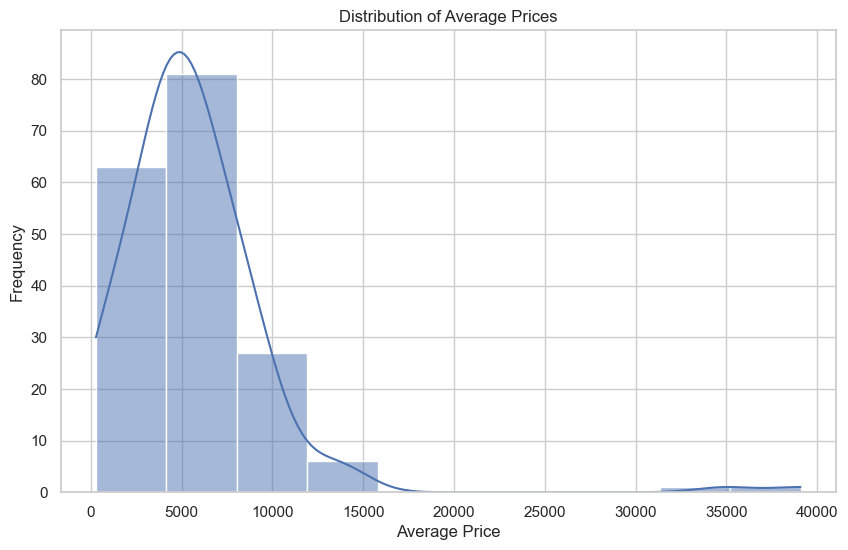

In [34]:
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['AvgPrice'], bins=10, kde=True)  # kde=True adds a density plot
plt.title('Distribution of Average Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

* so histogram came like this need to check if this have outliers 

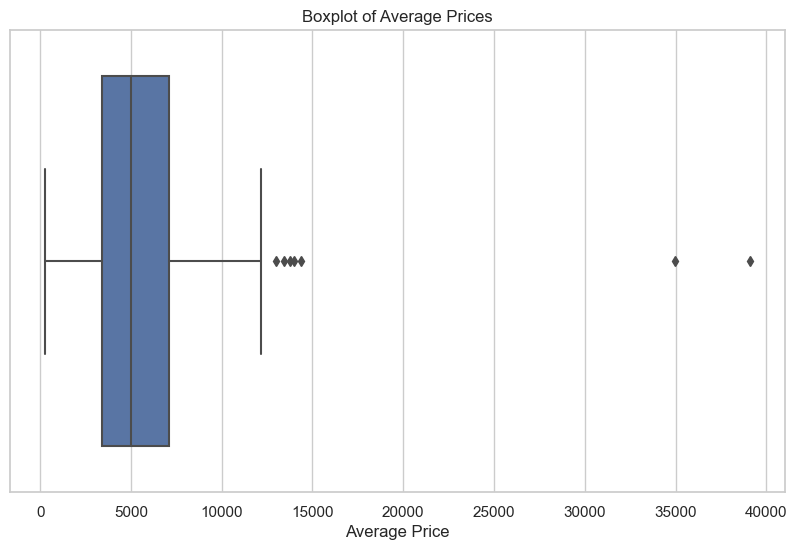

In [35]:
# Create a boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AvgPrice'])
plt.title('Boxplot of Average Prices')
plt.xlabel('Average Price')
plt.show()

In [39]:
q1 = df['AvgPrice'].quantile(0.25)
q2 = df['AvgPrice'].median()
min_value = df['AvgPrice'].min()
max_value = df['AvgPrice'].max()
q3 = df['AvgPrice'].quantile(0.75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['AvgPrice'] < lower_bound) | (df['AvgPrice'] > upper_bound)]

# Print the results
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (Median, 50th percentile): {q2}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Interquartile Range): {iqr}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Outliers:\n{outliers}")

Q1 (25th percentile): 3387.5
Q2 (Median, 50th percentile): 5000.0
Min Value: 277.26
Max Value: 39090.0
Q3 (75th percentile): 7100.35
IQR (Interquartile Range): 3712.8500000000004
Lower Bound for Outliers: -2181.7750000000005
Upper Bound for Outliers: 12669.625
Outliers:
                 ahamedabad_areas  AvgPrice
4                         Thaltej  13762.86
5                        Bodakdev  14350.21
9                       Satellite  34953.46
13                          Ambli  13991.88
101          Ahmedabad Cantonment  13414.63
136           Zydus Hospital Road  13000.00
137  Ahmedabad Patan Highway Road  39090.00


In [40]:
df_1 = pd.read_csv('web_data_scrape.csv')
df_1.head()


,ahamedabad_areas,AvgPrice
0,Bopal,9964.39
1,Shela,12152.33
2,Gota,8507.45
3,Chandkheda,920.77
4,Thaltej,13762.86


## Removed Outliers 

In [42]:
##### removed outliesrs
df_1 = df_1[(df_1['AvgPrice'] >= lower_bound) & (df_1['AvgPrice'] <= upper_bound)]

In [44]:
q1 = df_1['AvgPrice'].quantile(0.25)
q2 = df_1['AvgPrice'].median()
min_value = df_1['AvgPrice'].min()
max_value = df_1['AvgPrice'].max()
q3 = df_1['AvgPrice'].quantile(0.75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df_1[(df_1['AvgPrice'] < lower_bound) | (df_1['AvgPrice'] > upper_bound)]

# Print the results
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (Median, 50th percentile): {q2}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Interquartile Range): {iqr}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Outliers:\n{outliers}")

Q1 (25th percentile): 3255.75
Q2 (Median, 50th percentile): 4829.275
Min Value: 277.26
Max Value: 12152.33
Q3 (75th percentile): 6680.055
IQR (Interquartile Range): 3424.3050000000003
Lower Bound for Outliers: -1880.7075000000004
Upper Bound for Outliers: 11816.5125
Outliers:
  ahamedabad_areas  AvgPrice
1            Shela  12152.33


In [45]:
#### 
data = df_1['AvgPrice']

min_value = data.min()
max_value = data.max()
mean_value = data.mean()
std_dev = data.std()

print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")
print(f"Mean Value: {mean_value}")
print(f"Standard Deviation: {std_dev}")

Min Value: 277.26
Max Value: 12152.33
Mean Value: 5028.765232558139
Standard Deviation: 2642.291205402595


## categorizes the values based on mean_value and std_dev
* mean_value and std_dev calculate after remove the outliers 

In [46]:
# Define thresholds for categories
low_threshold = mean_value - std_dev
high_threshold = mean_value + std_dev

# Categorize function
def categorize(value):
    if value < low_threshold:
        return 'Low'
    elif low_threshold <= value <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
df_1['Category'] = df_1['AvgPrice'].apply(categorize)

In [49]:
print("Categorized Data:\n", df_1[['AvgPrice', 'Category']])

Categorized Data:
      AvgPrice Category
0     9964.39     High
1    12152.33     High
2     8507.45     High
3      920.77      Low
6     1130.71      Low
..        ...      ...
174   6875.00   Medium
175   2347.00      Low
176   6122.45   Medium
177   5666.67   Medium
178   4700.00   Medium

[172 rows x 2 columns]


* this data still doesnot have previously removed outliers need to add them  

In [57]:
# Specify the new output Excel file path
new_output_excel_path = r'C:\Users\Asus\Documents\SQL\SQL Project\flat-kaggle\from_python_la_01.xlsx'

# Output updated DataFrame to a new Excel file
df_1.to_excel(new_output_excel_path, index=False)
print(f"New file saved as: {new_output_excel_path}")

New file saved as: C:\Users\Asus\Documents\SQL\SQL Project\flat-kaggle\from_python_la_01.xlsx
